In [2]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
%matplotlib inline
import plotly
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import dabl
import math 
from sklearn.metrics import confusion_matrix 
from pandas.plotting import radviz 
from sklearn.preprocessing import LabelEncoder 
from math import *   

In [4]:
# read in data from csv

Student_exams_df = pd.read_csv('StudentsPerformance.csv')

Student_exams_df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [15]:
Student_exams_df['TotalScore'] = Student_exams_df['math score'] + Student_exams_df['reading score'] + Student_exams_df['writing score']
Student_exams_df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     TotalScore  
0           218  
1           247  
2           278  
3           148  
4           229  
..          ...  
995         282  
996         172  
997         195  
998         223  
999         249  

[1000 rows x 9 columns]

In [6]:
Student_exams_df[['race/ethnicity',
      'math score',
      'writing score',
      'reading score']].groupby(['race/ethnicity']).agg('median')

math score  writing score  reading score
race/ethnicity                                          
group A               61.0           62.0           64.0
group B               63.0           67.0           67.0
group C               65.0           68.0           71.0
group D               69.0           72.0           71.0
group E               74.5           72.0           74.0

In [7]:
#adding additional column to dataframe to hold the total scores 
lunch_df = Student_exams_df[["lunch","gender", "math score", "reading score", "writing score"]]
lunch_df['average'] =lunch_df.mean(axis=1)
lunch_df

lunch  gender  math score  reading score  writing score    average
0        standard  female          72             72             74  72.666667
1        standard  female          69             90             88  82.333333
2        standard  female          90             95             93  92.666667
3    free/reduced    male          47             57             44  49.333333
4        standard    male          76             78             75  76.333333
..            ...     ...         ...            ...            ...        ...
995      standard  female          88             99             95  94.000000
996  free/reduced    male          62             55             55  57.333333
997  free/reduced  female          59             71             65  65.000000
998      standard  female          68             78             77  74.333333
999  free/reduced  female          77             86             86  83.000000

[1000 rows x 6 columns]

In [8]:
# Using GroupBy in order to separate the data into fields according to "lunch" values
grouped_lunch_df = lunch_df.groupby(['lunch','average'])

# In order to be visualized, a data function must be used...
grouped_lunch_df.head()



lunch  gender  math score  reading score  writing score    average
0        standard  female          72             72             74  72.666667
1        standard  female          69             90             88  82.333333
2        standard  female          90             95             93  92.666667
3    free/reduced    male          47             57             44  49.333333
4        standard    male          76             78             75  76.333333
..            ...     ...         ...            ...            ...        ...
994      standard    male          63             63             62  62.666667
995      standard  female          88             99             95  94.000000
996  free/reduced    male          62             55             55  57.333333
997  free/reduced  female          59             71             65  65.000000
999  free/reduced  female          77             86             86  83.000000

[903 rows x 6 columns]

In [9]:
#Scatter plot that Compares reading, math, and writing score...if the students reading score improves
#do math and writing increase

pio.templates.default = "simple_white"

px.defaults.template = "ggplot2"
px.defaults.color_continuous_scale = px.colors.sequential.Blackbody
px.defaults.width = 1000
px.defaults.height = 800

#Plotting scores in scatter plot
fig = go.Figure(data = go.Scatter(x = lunch_df['math score'], y = lunch_df['reading score'], mode ='markers', 
                                  marker_color=lunch_df['average'],text = lunch_df['writing score'])) #hover text
fig.update_layout(title='Comparng Student Performance in Courses').update_layout(title_font_size=16)
fig.update_xaxes(showgrid=True).update_traces(marker=dict(size=20,line=dict(width=2,color ='DarkSlateGrey')),
                                               selector=dict(type="scatter", mode="markers"))
#labels 
labels ={"reading score": "Student Reading Score", "math score":"Student Math Score",
         'average': "Average Student Score"}
fig.update_layout(legend=dict(
    yanchor="top",
    y=.99,
    xanchor="left",
    x=.01))

fig.update_layout(margin=dict(l=60, r=60, t=60, b=60),paper_bgcolor="LightSteelBlue",)
fig.show()

In [10]:
# Free/Reduced vs standard lunch Generate some fake data to test with
def gendata(loc=0,same=True):
    lunch_df = stats.norm.rvs(size=1000, random_state=42)
    if same:
        sample = np.random.choice(lunch_df,size=200,replace=False)
    else:
        sample = stats.norm.rvs(loc=loc, size=200, random_state=42)

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(lunch_df,20, density=True, alpha=0.7, label="Student Performance")
    plt.hist(sample, 20, density=True, alpha=0.7, label="Sample")
    plt.axvline(lunch_df.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.rcParams['figure.figsize'] = (16, 18)
    plt.legend()  
    

    return lunch_df, sample


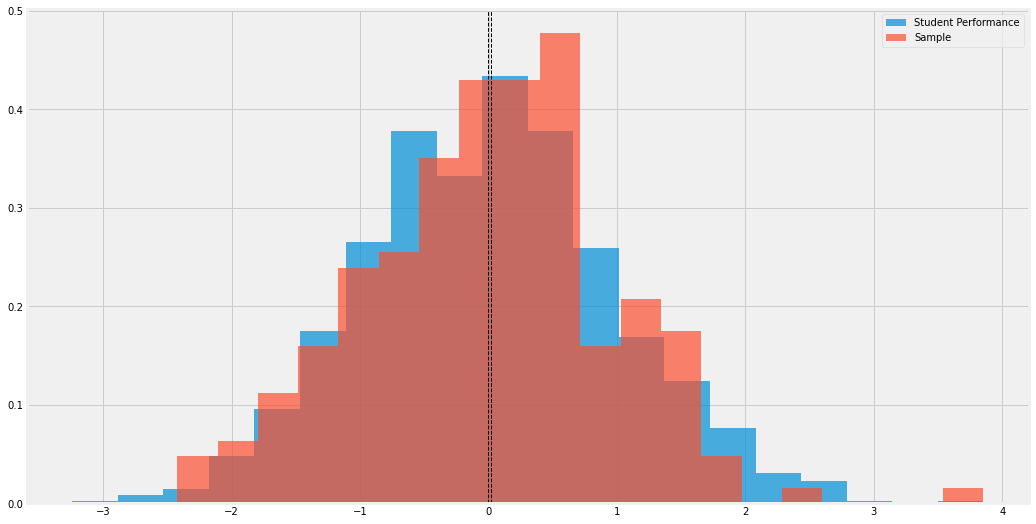

In [361]:
lunch_df, sample = gendata()


In [362]:
stats.ttest_1samp(sample, lunch_df.mean())

Ttest_1sampResult(statistic=-0.4066827272428638, pvalue=0.684678073194032)

In [11]:
# Is there any correlation between parental education level and student exam performance
# need to edit dataframe
students_df = Student_exams_df[['parental level of education','math score','reading score', 'writing score']]
average=(students_df['math score']+students_df['reading score']+students_df['writing score'])/3
students_df['average']=average
some_college_data = students_df.loc[students_df["parental level of education"] == "some college"]
some_highschool_data= students_df.loc[students_df["parental level of education"] == "some high school"]
highschool_data = students_df.loc[students_df["parental level of education"] == "high school"]
bachelors_data = students_df.loc[students_df["parental level of education"] == "bachelor's degree"]
masters_data = students_df.loc[students_df["parental level of education"] == "master's degree"]
associate_data = students_df.loc[students_df["parental level of education"] == "associate's degree"]

students_df.head()

parental level of education  math score  reading score  writing score  \
0           bachelor's degree          72             72             74   
1                some college          69             90             88   
2             master's degree          90             95             93   
3          associate's degree          47             57             44   
4                some college          76             78             75   

     average  
0  72.666667  
1  82.333333  
2  92.666667  
3  49.333333  
4  76.333333

In [12]:
#computaion of each total averages by level of education
some_college_avg=some_college_data['average'].mean()
some_highschool_avg=some_highschool_data['average'].mean()
highschool_avg=highschool_data['average'].mean()
bachelors_avg=bachelors_data['average'].mean()
masters_avg=masters_data['average'].mean()
associate_avg=associate_data['average'].mean()


In [343]:
#Bar char represenstaion of Parental education vs average 
px.box(students_df,x="parental level of education", y="average")


In [162]:
#takes student avg vs parental degree level and compares them
fig = px.line(x=['some highschool','high school', 'some college', 'associate\'s degree', 
                 'bachelor\s degree','master\s degree'], 
              y=[some_highschool_avg, highschool_avg, some_college_avg, associate_avg,bachelors_avg,masters_avg])
fig.show()

In [200]:
#question 3 df avg scores for students who prepared vs those who didnt
#takes in data
Student_exams_df[["math score", "reading score", "writing score"]].head()

math score  reading score  writing score
0          72             72             74
1          69             90             88
2          90             95             93
3          47             57             44
4          76             78             75

Target looks like regression


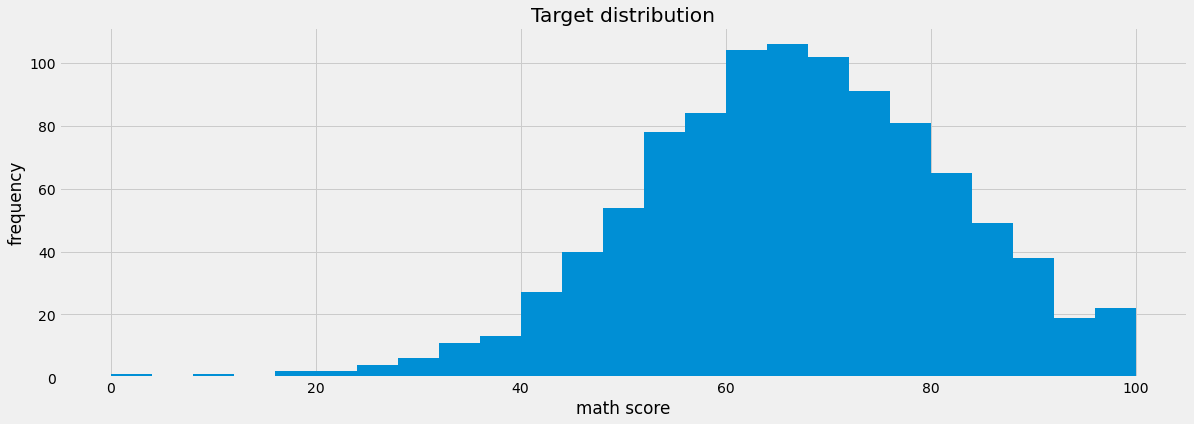

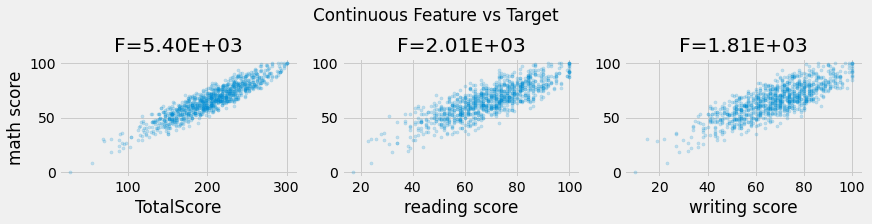

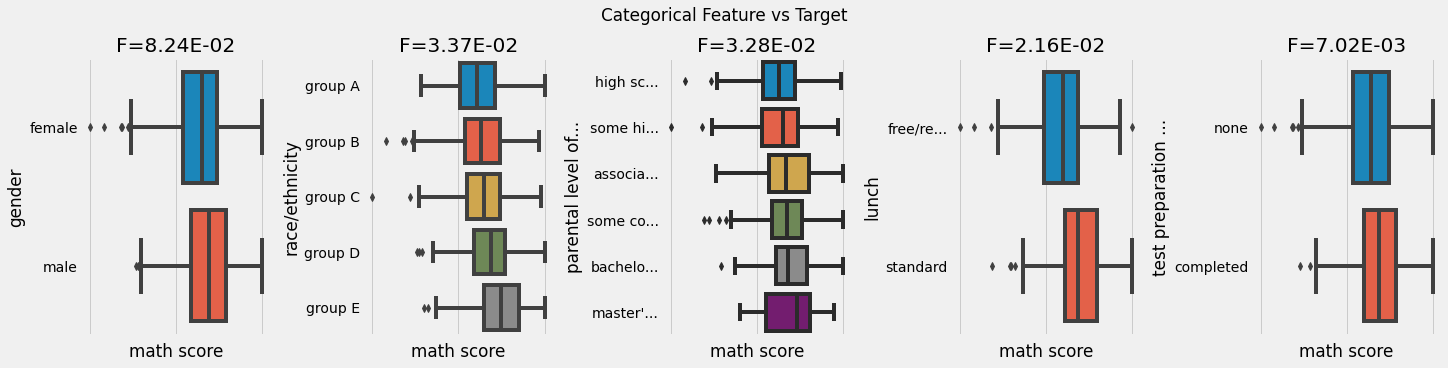

In [16]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(Student_exams_df, target_col = 'math score')

Target looks like regression


/Users/debo/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/debo/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/debo/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/debo/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/debo/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning:

FixedFormatter should only be used together with FixedLocator



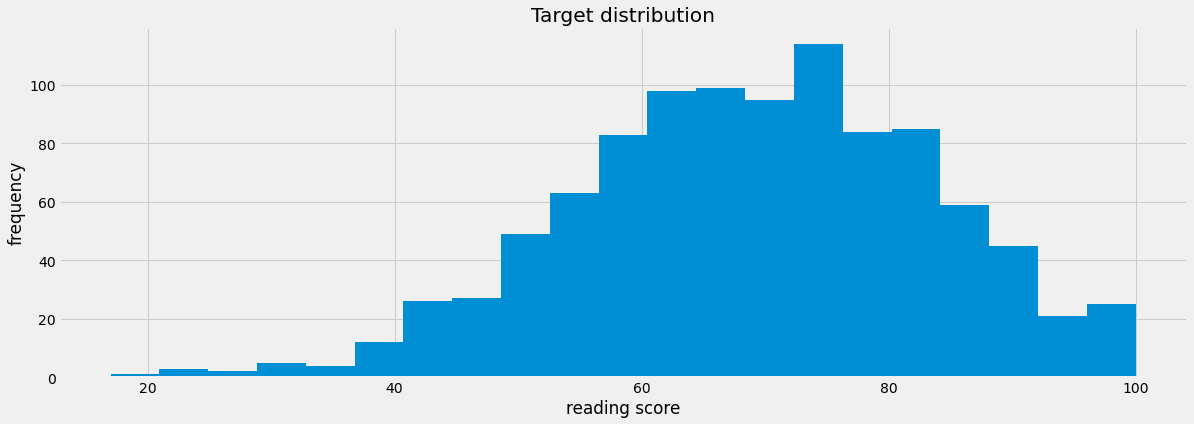

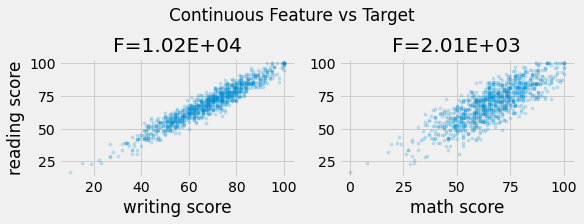

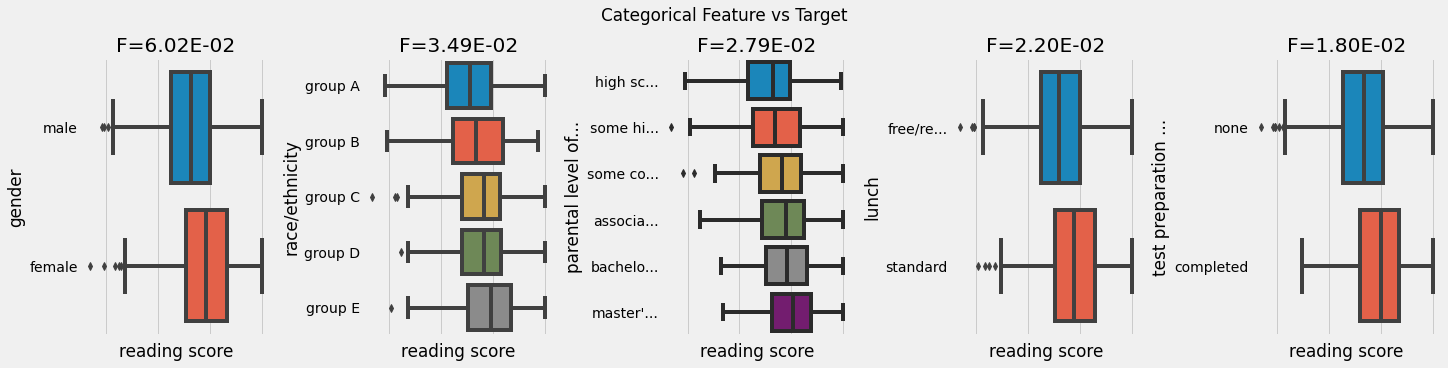

In [203]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(Student_exams_df, target_col = 'reading score')

Target looks like regression


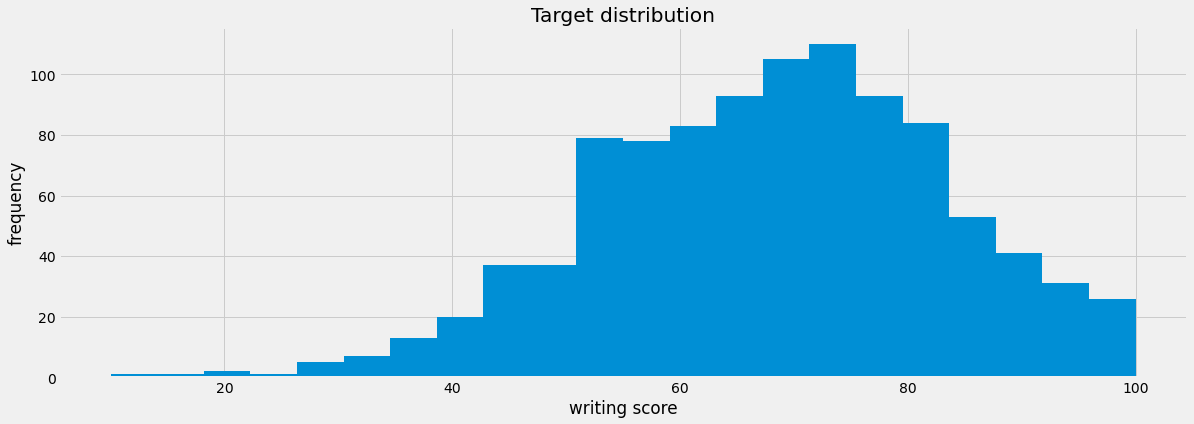

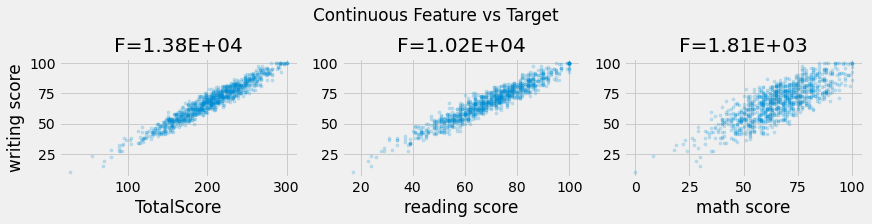

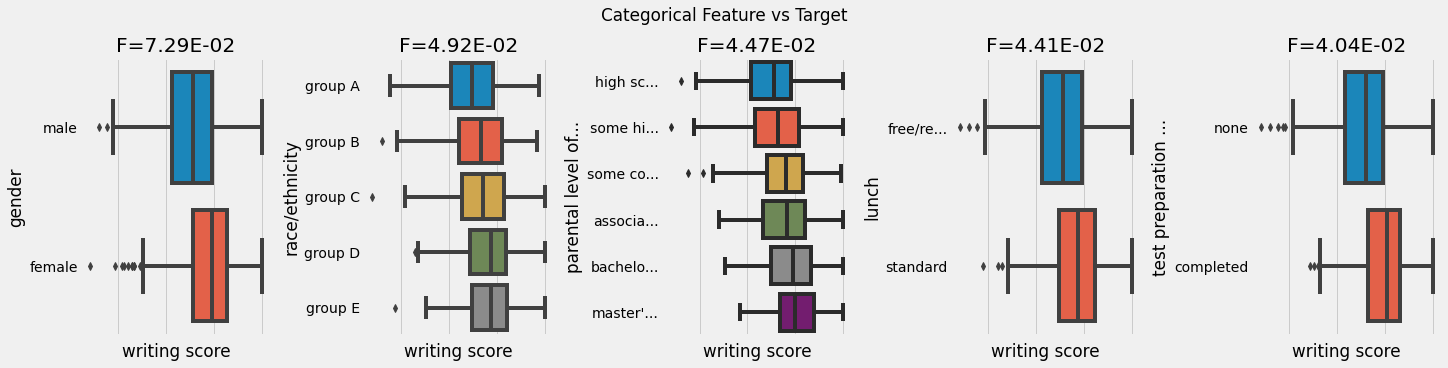

In [17]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(Student_exams_df, target_col = 'writing score')

In [205]:
Student_exams_df[['test preparation course',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course']).agg('mean')

math score  writing score  reading score
test preparation course                                          
completed                 69.695531      74.418994      73.893855
none                      64.077882      64.504673      66.534268

In [18]:
Student_exams_df[['test preparation course',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course']).agg('median')

math score  writing score  reading score
test preparation course                                          
completed                        69             76             75
none                             64             65             67

<AxesSubplot:title={'center':'math score'}, xlabel='test preparation course'>

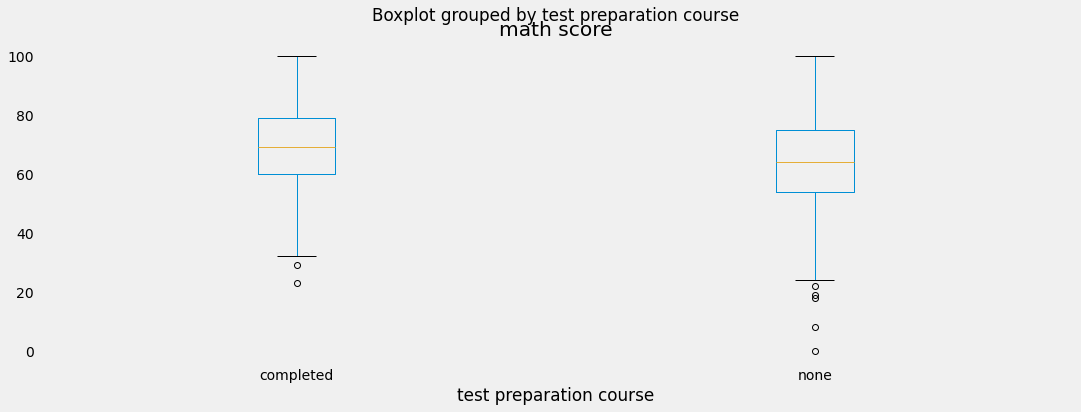

In [208]:
Student_exams_df.boxplot(by ='test preparation course', column =['math score'], grid = False)

<AxesSubplot:title={'center':'reading score'}, xlabel='test preparation course'>

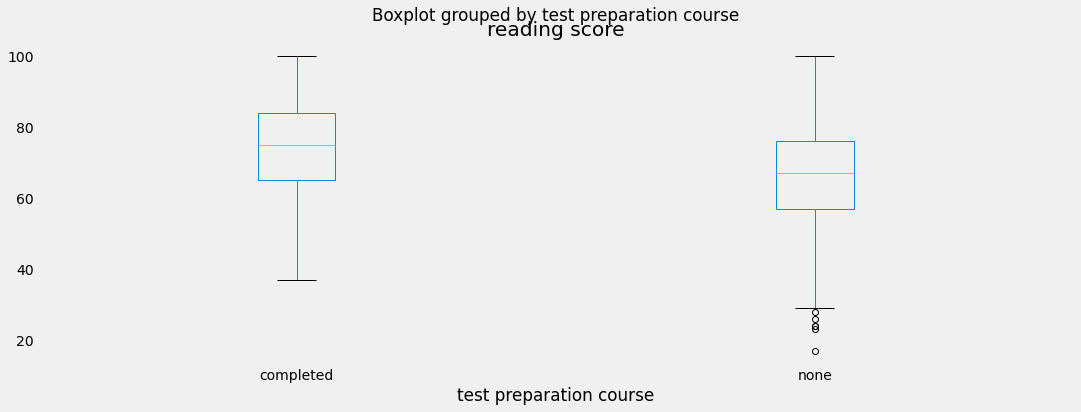

In [209]:
Student_exams_df.boxplot(by ='test preparation course', column =['reading score'], grid = False)

<AxesSubplot:title={'center':'writing score'}, xlabel='test preparation course'>

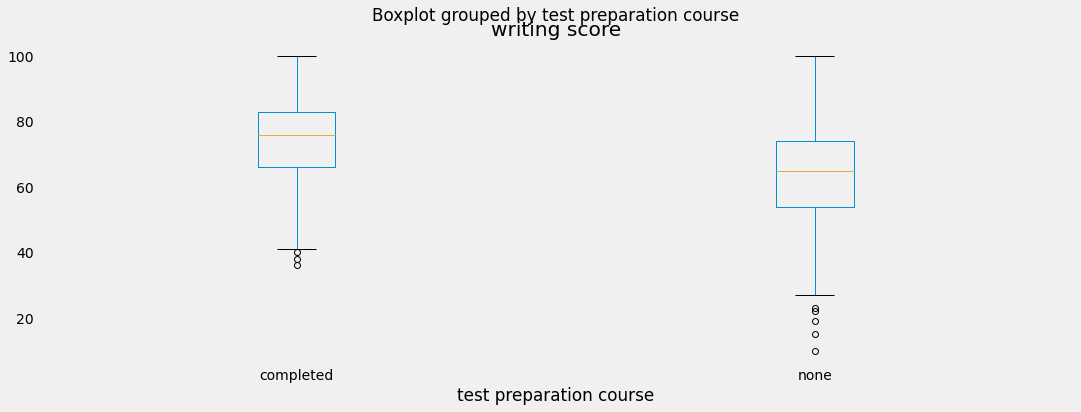

In [211]:
Student_exams_df.boxplot(by ='test preparation course', column =['writing score'], grid = False)

In [3]:
#Race/Ethnicity compared to overal scores

Student_exams_df[['race/ethnicity', 
      'math score', 
      'writing score', 
      'reading score']].groupby(['race/ethnicity']).agg('median') 

NameError: name 'Student_exams_df' is not defined

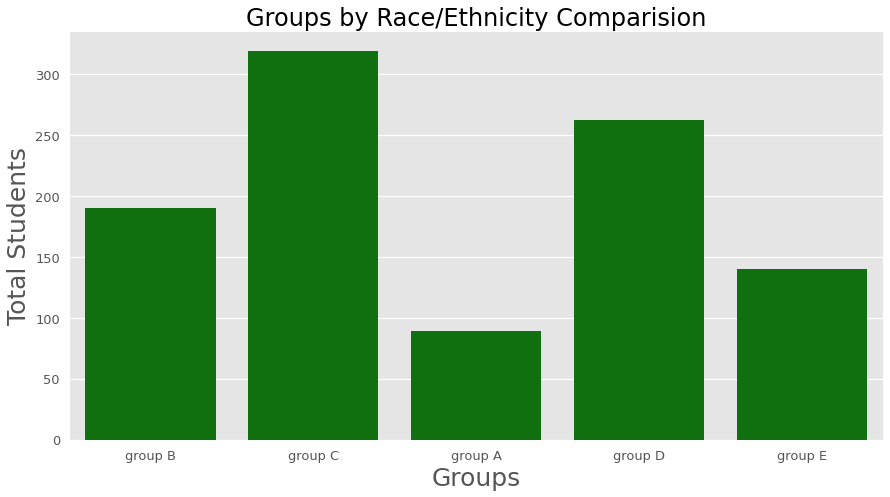

In [373]:
# visualizing races/ethnicities in the dataset 
 
plt.rcParams['figure.figsize'] = (13, 7) 
plt.style.use('ggplot') 
sns.countplot(Student_exams_df['race/ethnicity'], color = 'Green') 
plt.title('Groups by Race/Ethnicity Comparision', fontweight = 42, fontsize = 24) 
plt.xlabel('Groups', fontsize = 25) 
plt.ylabel('Total Students',fontsize = 25) 
plt.show() 

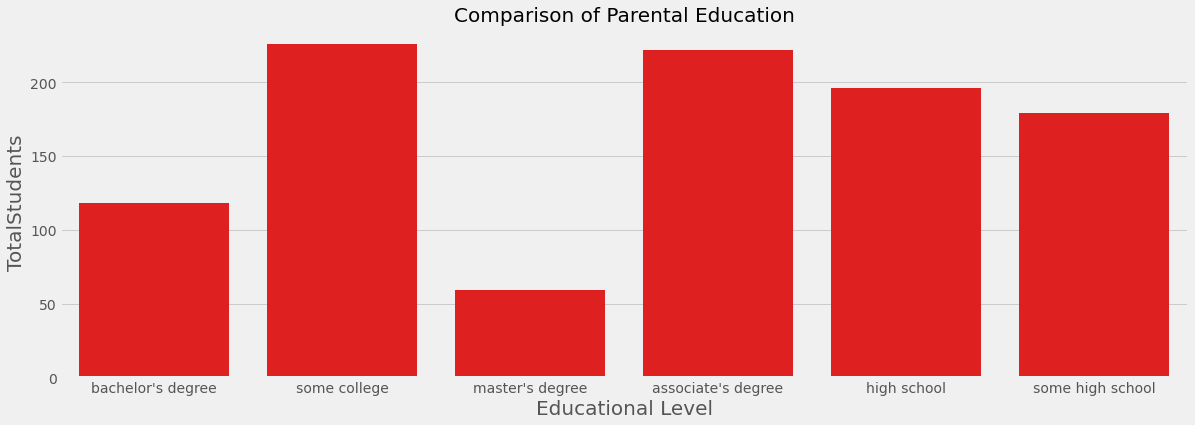

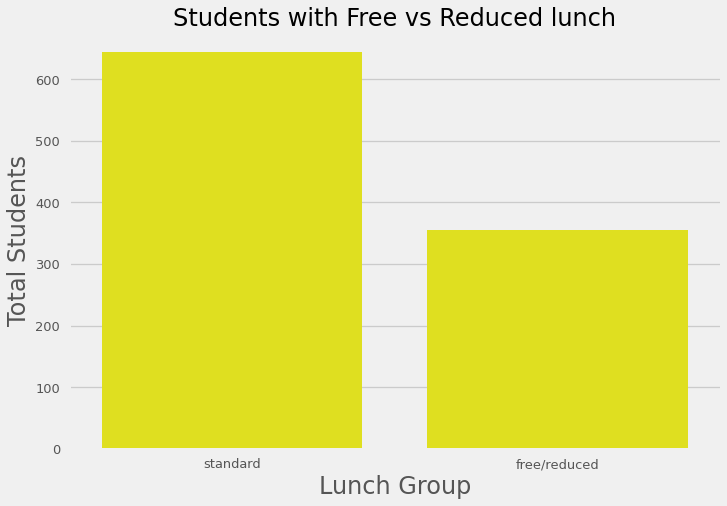

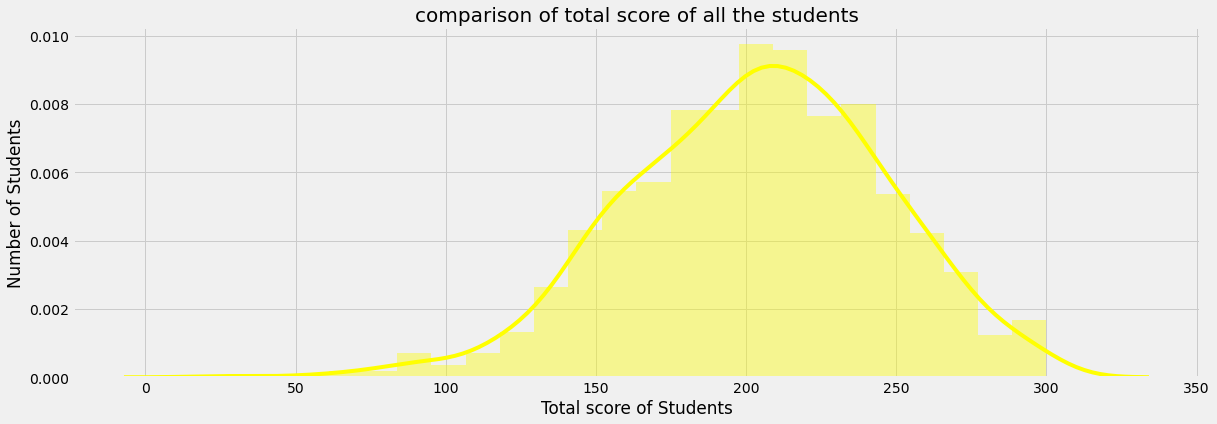

In [20]:
#Calculating the total score for each student

import warnings
warnings.filterwarnings('ignore')

Student_exams_df['TotalScore'] = Student_exams_df['math score'] + Student_exams_df['reading score'] + Student_exams_df['writing score']

sns.distplot(Student_exams_df['TotalScore'], color = 'yellow')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Total score of Students')
plt.ylabel('Number of Students')
plt.show()




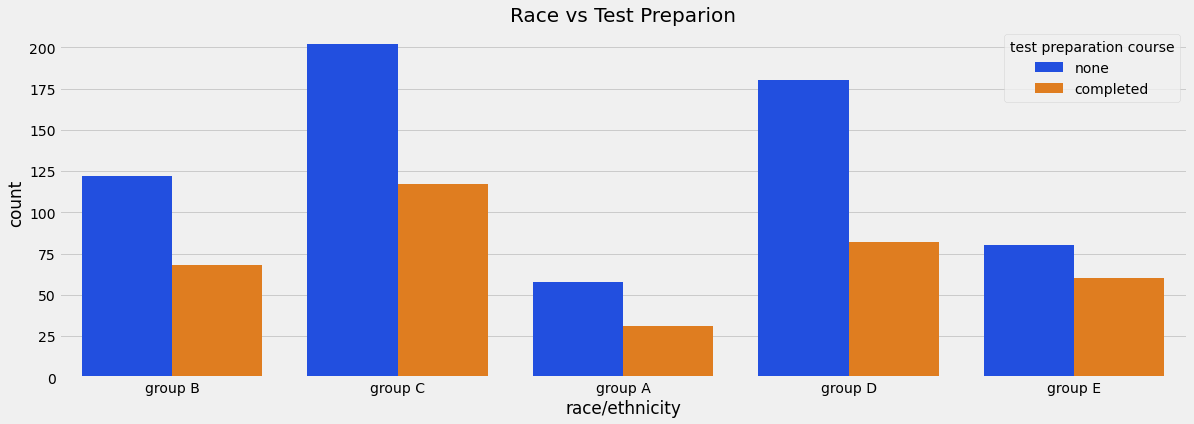

In [22]:
# comparison of race/ethnicity and test preparation course

sns.countplot(x = 'race/ethnicity', data = Student_exams_df,  hue = 'test preparation course', palette = 'bright')
plt.title('Race vs Test Preparion', fontweight = 30, fontsize = 20)
plt.show()

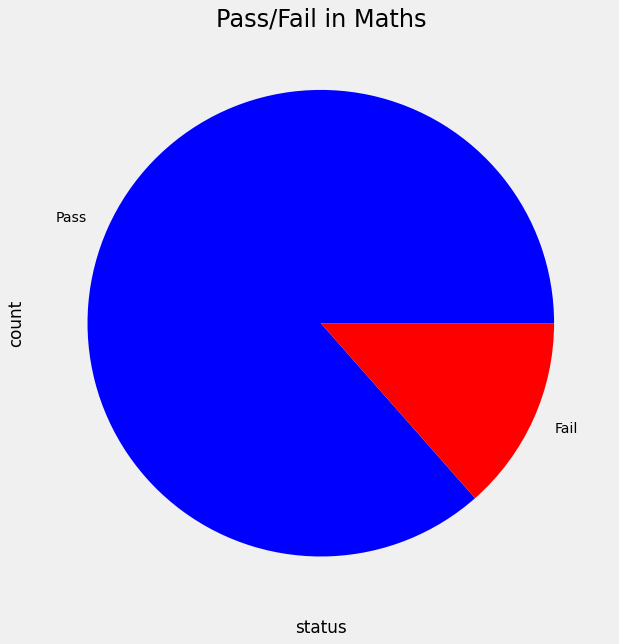

In [23]:

#setting a passing score for the students to pass each subjects separately
passingScore = 50

# creating additional column pass_math to determine a pass or fail
Student_exams_df['pass_math'] = np.where(Student_exams_df['math score']< passingScore, 'Fail', 'Pass')
plt.rcParams['figure.figsize'] = (15, 10)
Student_exams_df['pass_math'].value_counts().plot.pie(colors = ['blue', 'red'])

plt.title('Pass/Fail in Maths', fontweight = 40, fontsize = 24)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

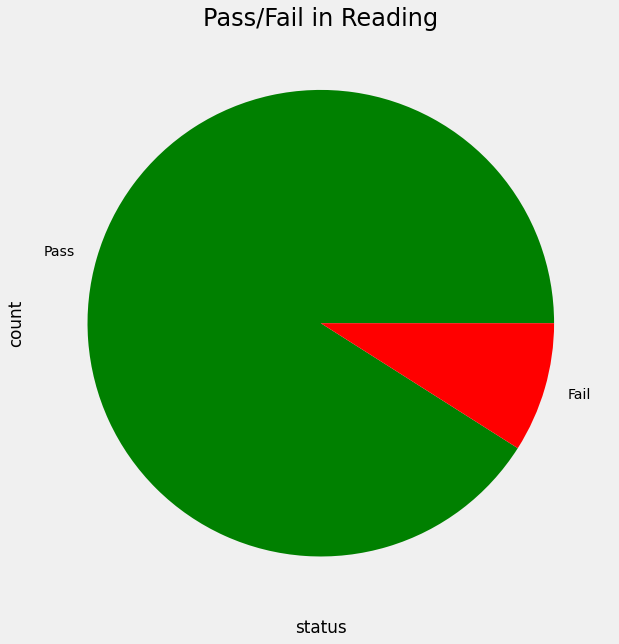

In [24]:
# creating additional column pass_reading to determine a pass or fail

Student_exams_df['pass_reading'] = np.where(Student_exams_df['reading score']< passingScore, 'Fail', 'Pass')
plt.rcParams['figure.figsize'] = (15, 10)
Student_exams_df['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['green', 'red'])

plt.title('Pass/Fail in Reading', fontweight = 40, fontsize = 24)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

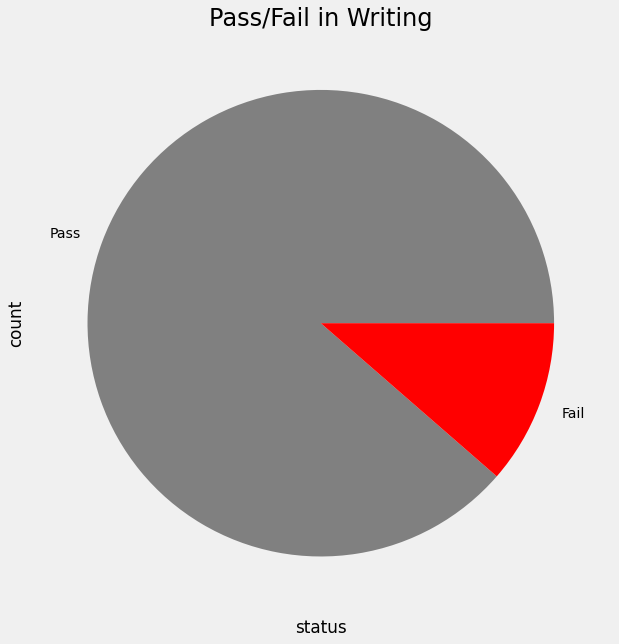

In [26]:
# Determining pass or fail in writing

Student_exams_df['pass_writing'] = np.where(Student_exams_df['writing score']< passingScore, 'Fail', 'Pass')
plt.rcParams['figure.figsize'] = (15, 10)
Student_exams_df['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['grey', 'red'])

plt.title('Pass/Fail in Writing', fontweight = 40, fontsize = 24)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [30]:
Student_exams_df.drop(columns=['pass_math', 'pass_reading', 'pass_writing'])

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     TotalScore  
0           218  
1           247  
2           278  
3           148  
4           229  
..          ...  
995         282  
996         172  
997         195  
998         223  
999         249  

[1000 rows x 9 columns]

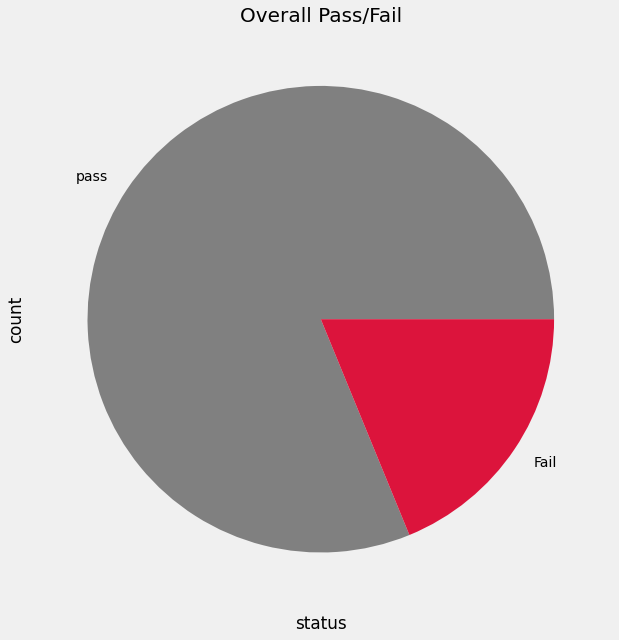

In [31]:
# checking which student is fail overall

Student_exams_df['status'] = Student_exams_df.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

Student_exams_df['status'].value_counts(dropna = False).plot.pie(colors = ['grey', 'crimson'])
plt.title('Overall Pass/Fail', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [32]:
fig = px.scatter(data_frame=Student_exams_df, x="race/ethnicity",y="TotalScore", hover_data=["status"], color='status', title = "Race/Ethnicity VS Total Score")
fig.show()

In [33]:
fig = px.scatter(data_frame=Student_exams_df, x="parental level of education",y="TotalScore", hover_data=["status"], color='status', title = "Parental Level of Education VS Total Score")
fig.show()

In [34]:
fig = px.scatter(data_frame=Student_exams_df, x="lunch",y="TotalScore", hover_data=["status"], color='status', title = "Free/Standard Lunch VS Total Score")
fig.show()

In [35]:
fig = px.scatter(data_frame=Student_exams_df, x="gender",y="TotalScore", hover_data=["status"], color='status', title = "Gender VS Total Score")
fig.show()

In [36]:
fig = px.scatter(data_frame=Student_exams_df, x="test preparation course",y="TotalScore", hover_data=["status"], color='status', title = "Test Preparation VS Total Score")
fig.show()